In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("water.csv")
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


######Unnamed: 0	 - сортировка
######location - регион
######town - город
######mortality - смертность 
######hardness - жесткость

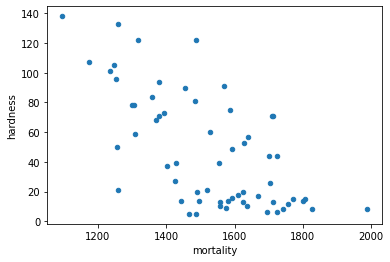

In [ ]:
# визуализируем взаимосвязь жёсткостью воды и средней годовой смертностью
df.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['mortality']]
y = df[['hardness']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(42, 1)

In [ ]:
y_train.shape

(42, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[-0.12670202]])

In [ ]:
model.intercept_

array([239.36784261])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[81.3704298 ],
       [41.96610311],
       [49.94833006],
       [23.72101293],
       [73.76830889],
       [33.4770681 ],
       [79.85000562],
       [38.29174467],
       [46.9074817 ],
       [24.48122503],
       [73.51490486],
       [51.21535021],
       [42.34620915],
       [11.30421546],
       [22.83409883],
       [58.43736507],
       [31.95664392],
       [10.41730135],
       [82.76415197]])

In [ ]:
y_test

,hardness
0,105
5,10
46,14
31,44
13,78
55,20
34,133
49,75
12,21
40,6


In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4948982822876836

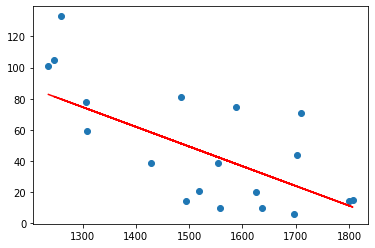

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Tue, 10 May 2022   Prob (F-statistic):           7.83e-06
Time:                        11:36:35   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

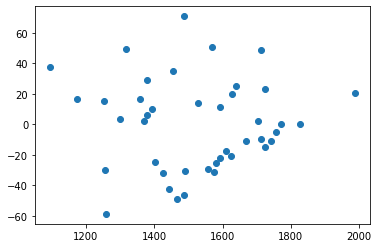

In [ ]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <a list of 10 Patch objects>)

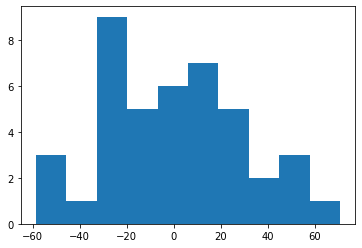

In [ ]:
plt.hist(results.resid)

In [ ]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


##South	

In [ ]:
df1 = df.loc[df['location'] == 'South']
df1.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


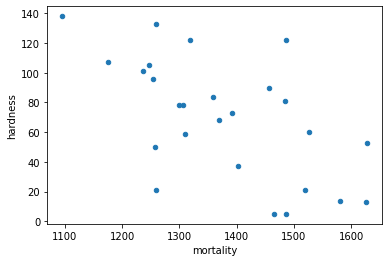

In [ ]:
# визуализируем взаимосвязь жёсткостью воды и средней годовой смертностью
df1.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# считаем коэф. корреляции Пирсона
df1[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df1[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
X1 = df1[['mortality']]
y1 = df1[['hardness']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=50)

In [ ]:
X1_train.shape

(18, 1)

In [ ]:
y1_train.shape

(18, 1)

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
y1_pred = model1.predict(X1_test)
y1_pred

array([[ 26.47703266],
       [ 75.96293588],
       [ 44.3521688 ],
       [ 86.87617689],
       [ 87.06433622],
       [102.86971976],
       [ 18.19802224],
       [ 44.54032813]])

In [ ]:
y1_test

,hardness
32,14
18,122
58,122
19,21
34,133
37,107
54,13
59,81


In [ ]:
model1.score(X1_test, y1_test) # метод возвращает значение коэффициента детерминации

0.16446378819489627

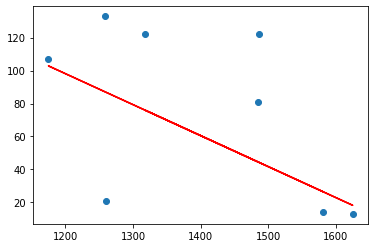

In [ ]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, c='r')

In [ ]:
X1_const = sm.add_constant(X1_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model1 = sm.OLS(y1_train, X1_const)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     15.64
Date:                Tue, 10 May 2022   Prob (F-statistic):            0.00113
Time:                        11:36:37   Log-Likelihood:                -82.909
No. Observations:                  18   AIC:                             169.8
Df Residuals:                      16   BIC:                             171.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        323.9569     65.317      4.960      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


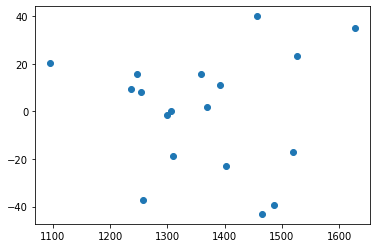

In [ ]:
# посмотрим на остатки
plt.scatter(X1_const.iloc[:, 1], results1.resid)

(array([3., 0., 2., 1., 0., 3., 3., 4., 0., 2.]),
 array([-43.11535536, -34.80351469, -26.49167402, -18.17983334,
         -9.86799267,  -1.556152  ,   6.75568867,  15.06752935,
         23.37937002,  31.69121069,  40.00305136]),
 <a list of 10 Patch objects>)

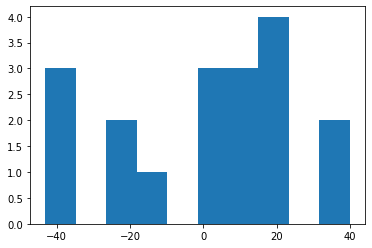

In [ ]:
plt.hist(results1.resid)

##North

In [ ]:
df2 = df.loc[df['location'] == 'North']
df2.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


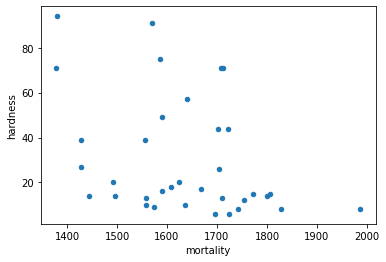

In [ ]:
# визуализируем взаимосвязь жёсткостью воды и средней годовой смертностью
df2.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# считаем коэф. корреляции Пирсона
df2[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df2[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
X2 = df2[['mortality']]
y2 = df2[['hardness']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=50)

In [ ]:
X2_train.shape

(24, 1)

In [ ]:
y2_train.shape

(24, 1)

In [ ]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y2_pred = model2.predict(X2_test)
y2_pred

array([[19.98108863],
       [38.44734786],
       [52.93761826],
       [25.10569646],
       [27.84471098],
       [26.69609199],
       [22.45503724],
       [41.62813892],
       [ 3.45864617],
       [46.92945736],
       [51.43557803]])

In [ ]:
y2_test

,hardness
3,14
44,49
35,27
22,8
42,13
36,6
28,15
16,39
45,8
46,14


In [ ]:
model2.score(X2_test, y2_test) # метод возвращает значение коэффициента детерминации

-1.2770235072082876

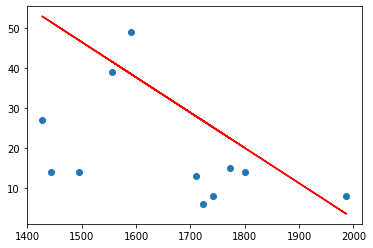

In [ ]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_pred, c='r')

In [ ]:
X2_const = sm.add_constant(X2_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model2 = sm.OLS(y2_train, X2_const)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.426
Date:                Tue, 10 May 2022   Prob (F-statistic):             0.0777
Time:                        11:36:38   Log-Likelihood:                -112.51
No. Observations:                  24   AIC:                             229.0
Df Residuals:                      22   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.0206     77.631      2.306      0.0

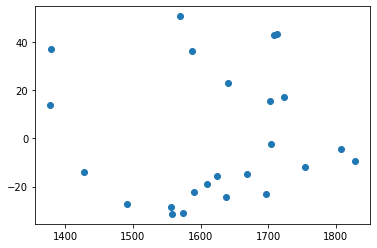

In [ ]:
# посмотрим на остатки
plt.scatter(X2_const.iloc[:, 1], results2.resid)

(array([6., 3., 4., 2., 0., 3., 1., 0., 2., 3.]),
 array([-31.363073  , -23.16588216, -14.96869132,  -6.77150049,
          1.42569035,   9.62288119,  17.82007203,  26.01726287,
         34.2144537 ,  42.41164454,  50.60883538]),
 <a list of 10 Patch objects>)

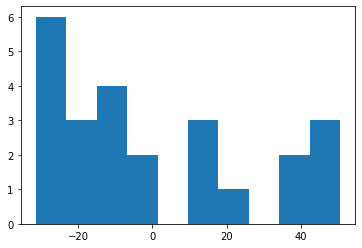

In [ ]:
plt.hist(results2.resid)